In [1]:
%matplotlib inline

import sys
sys.path.append("../")

import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob

In [18]:
class_mapper = {
            'Normal': 'Normal',
            'Benign': 'Normal',
            'ASCUS': 'Low-Risk',
            'LSIL': 'High-Risk',
            'HSIL': 'High-Risk',
            'Carcinoma': 'High-Risk',
}

labels_info_path = "../data/labels_info.npy"
partition_path = "../data/partition.npy"

labels_info = np.load(labels_info_path, allow_pickle=True, encoding='latin1').item()
partition = np.load(partition_path, allow_pickle=True, encoding='latin1').item()

In [9]:
# Check if having multiple classes in a single image.
one_class_IDs = []
multi_class_IDs = []

for k, v in labels_info.items():
    cnames = [class_mapper.get(label[0]) for label in v]
    uniq_cnames = np.unique(cnames)
    if len(uniq_cnames) > 1:
        multi_class_IDs.append(k)
    else:
        one_class_IDs.append(k)
        
print("Num of Single Class Image: {}".format(len(one_class_IDs)))
print("Num of Multiple Class Image: {}".format(len(multi_class_IDs)))

Num of Single Class Image: 18601
Num of Multiple Class Image: 89


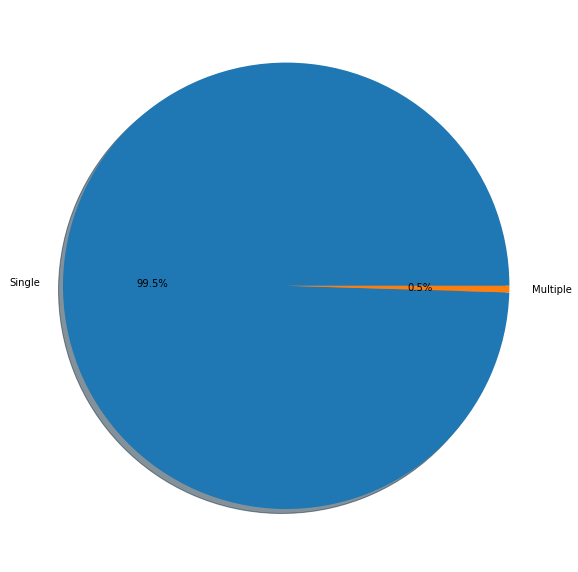

In [17]:
plt.figure(figsize=(10, 20))
plt.pie(
    x=[len(one_class_IDs), len(multi_class_IDs)],
    labels=['Single', "Multiple"], 
    autopct='%1.1f%%', shadow=True
);

In [10]:
# Visualize classes distribution.
normal_IDs = []
low_risk_IDs = []
high_risk_IDs = []

for ID in one_class_IDs:
    v = labels_info.get(ID)
    cnames = [class_mapper.get(label[0]) for label in v]
    if "Normal" in cnames:
        normal_IDs.append(ID)

    elif "Low-Risk" in cnames:
        low_risk_IDs.append(ID)
    
    else:
        high_risk_IDs.append(ID)
        
print("Num of [Normal] Image: {}".format(len(normal_IDs)))
print("Num of [Low-Risk] Image: {}".format(len(low_risk_IDs)))
print("Num of [High-Risk] Image: {}".format(len(high_risk_IDs)))

Num of [Normal] Image: 1563
Num of [Low-Risk] Image: 3365
Num of [High-Risk] Image: 13673


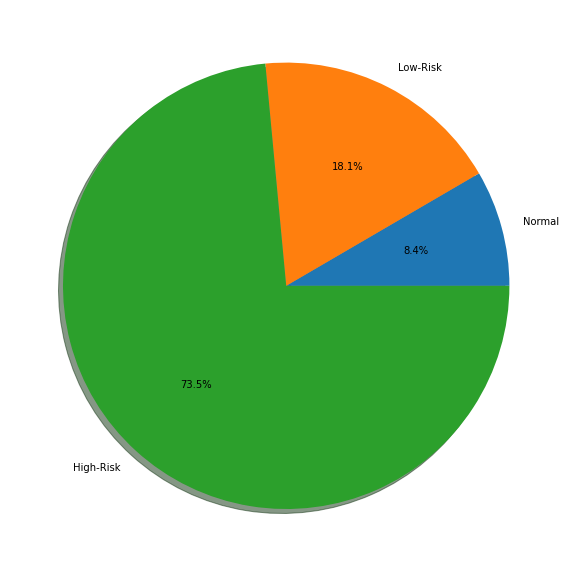

In [16]:
plt.figure(figsize=(10, 20))
plt.pie(
    x=[len(normal_IDs), len(low_risk_IDs), len(high_risk_IDs)],
    labels=['Normal', "Low-Risk", "High-Risk"], 
    autopct='%1.1f%%', shadow=True
);